#### **📌 Task 1: Environment Setup**

In [1]:
## 📌 Task 1.1: Mounting Google Drive to access project files and store outputs
print("\n📌 Task 1.1: Mounting Google Drive")
from google.colab import drive
# I'm mounting Google Drive so that I can load dataset, weights and save results
drive.mount('/content/drive')


📌 Task 1.1: Mounting Google Drive
Mounted at /content/drive


In [2]:
## 📌 Defining Drive Paths for Dataset, Model, and Output Folders
import os

# 📁 Defining base and subfolder paths for the project
base_path      = '/content/drive/MyDrive/CustomOCR'
dataset_path   = os.path.join(base_path, 'datasets')
model_dir      = os.path.join(base_path, 'models')
model_path     = os.path.join(model_dir, 'best.onnx')
results_path   = os.path.join(base_path, 'results')

# ✅ Displaying folder structure status
print("📦 Folder paths set up successfully:")
print(f"   📁 Dataset Directory : {dataset_path}")
print(f"   📁 Model Directory   : {model_dir}")
print(f"   📁 Results Directory : {results_path}")
print(f"   📄 Model File Path   : {model_path}")

📦 Folder paths set up successfully:
   📁 Dataset Directory : /content/drive/MyDrive/CustomOCR/datasets
   📁 Model Directory   : /content/drive/MyDrive/CustomOCR/models
   📁 Results Directory : /content/drive/MyDrive/CustomOCR/results
   📄 Model File Path   : /content/drive/MyDrive/CustomOCR/models/best.onnx


#### **📌 Task 1.2: Installing necessary dependencies**

In [3]:
# I'm installing Python packages required for this project
!pip install opencv-python-headless pytesseract numpy pandas matplotlib
# I'm installing Tesseract OCR engine
!apt install tesseract-ocr -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [4]:
# 📌 Task 2.0.2: Cloning YOLOv5 Repo and Setting Up in Drive

# 🧬 Cloning the official YOLOv5 repository into Colab
print("📥 Cloning YOLOv5 repository from GitHub...")
!git clone https://github.com/ultralytics/yolov5.git

# 🚚 Moving the cloned repo into your Google Drive under /CustomOCR
print("📂 Moving YOLOv5 to Google Drive > CustomOCR/yolov5 ...")
!mv yolov5 /content/drive/MyDrive/CustomOCR/yolov5

# 🔄 Changing working directory to the YOLOv5 folder in Drive
import os
os.chdir('/content/drive/MyDrive/CustomOCR/yolov5')
print("✅ Working directory set to: /content/drive/MyDrive/CustomOCR/yolov5")

📥 Cloning YOLOv5 repository from GitHub...
Cloning into 'yolov5'...
remote: Enumerating objects: 17511, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 17511 (delta 5), reused 0 (delta 0), pack-reused 17493 (from 3)
Receiving objects: 100% (17511/17511), 16.60 MiB | 25.76 MiB/s, done.
Resolving deltas: 100% (11993/11993), done.
📂 Moving YOLOv5 to Google Drive > CustomOCR/yolov5 ...
mv: inter-device move failed: 'yolov5' to '/content/drive/MyDrive/CustomOCR/yolov5/yolov5'; unable to remove target: Directory not empty
✅ Working directory set to: /content/drive/MyDrive/CustomOCR/yolov5


In [5]:
# I'm installing YOLOv5 requirements
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 827.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 71.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [6]:
# 📌 Task 2.0: Preparing data.yaml for YOLOv5
import shutil
import glob
import os
import cv2

# 📁 Defining training structure paths
dataset_path = '/content/drive/MyDrive/CustomOCR/datasets'
split_path = '/content/drive/MyDrive/CustomOCR/data_images'
train_img_dir = os.path.join(split_path, 'train')
test_img_dir = os.path.join(split_path, 'test')

# 📄 Creating data.yaml for YOLOv5
yaml_path = '/content/drive/MyDrive/CustomOCR/yolov5/data.yaml'
yaml_content = f'''\
train: ../data_images/train
val: ../data_images/test

nc: 4
names: ["Test Name", "Value", "Units", "Reference Range"]
'''

with open(yaml_path, 'w') as f:
    f.write(yaml_content)

print(f"✅ data.yaml file created at:")
print(f"   📄 {yaml_path}")

✅ data.yaml file created at:
   📄 /content/drive/MyDrive/CustomOCR/yolov5/data.yaml


In [7]:
# 📌 Task 2.1: model training (200 epochs)

# ✅ Disabling WANDB tracking to avoid login issues or warnings
import os
os.environ['WANDB_MODE'] = 'disabled'

# 🔁 Making sure we are inside the yolov5 directory
os.chdir('/content/drive/MyDrive/CustomOCR/yolov5')
print("📂 Working directory: yolov5")

# 🚀 Training YOLOv5 for 200 epochs
print("🚀 Starting training (200 epochs)...")
# !WANDB_MODE=disabled python train.py --data data.yaml --weights yolov5s.pt --img 640 --batch-size 2 --name Model --epochs 50
!WANDB_MODE=disabled python train.py --data data.yaml --weights runs/train/Model2/weights/best.pt --img 640 --batch-size 2 --name Model --epochs 200

Streaming output truncated to the last 5000 lines.
  with torch.cuda.amp.autocast(amp):
     89/199     0.992G     0.0507    0.03228    0.02558          8        640:  25% 5/20 [00:00<00:01,  7.70it/s]/content/drive/MyDrive/CustomOCR/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     89/199     0.992G     0.0521    0.03192    0.02421         18        640:  30% 6/20 [00:00<00:01,  7.26it/s]/content/drive/MyDrive/CustomOCR/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
     89/199     0.992G    0.05347    0.03344    0.02526         20        640:  35% 7/20 [00:00<00:01,  7.69it/s]/content/drive/MyDrive/CustomOCR/yolov5/train.py:414: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.auto

In [15]:
# 📌 Task 2.4: Exporting best.pt to ONNX format and saving both files to /models/

print("📦 Exporting best.pt to ONNX format...")

# ✅ Set path to your trained weights
best_pt_path = "/content/drive/MyDrive/CustomOCR/yolov5/runs/train/Model5/weights/best.pt"

# ✅ Change directory to yolov5 before running export
%cd /content/drive/MyDrive/CustomOCR/yolov5

# ✅ Run export to generate ONNX model in same folder as best.pt
!python export.py --weights {best_pt_path} --include onnx --simplify --opset 12

# ✅ Move ONNX model to /models/
!mv runs/train/Model5/weights/best.onnx /content/drive/MyDrive/CustomOCR/models/best.onnx

# ✅ Copy best.pt also to /models/
!cp {best_pt_path} /content/drive/MyDrive/CustomOCR/models/best.pt

print("✅ Both best.pt and best.onnx saved to: /MyDrive/CustomOCR/models/")

📦 Exporting best.pt to ONNX format...
/content
export: data=data/coco128.yaml, weights=['/content/drive/MyDrive/CustomOCR/yolov5/runs/train/Model5/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, keras=False, optimize=False, int8=False, per_tensor=False, dynamic=False, cache=, simplify=True, mlmodel=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['onnx']
YOLOv5 🚀 v7.0-422-g2540fd4c Python-3.11.13 torch-2.6.0+cu124 CPU

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from /content/drive/MyDrive/CustomOCR/yolov5/runs/train/Model5/weights/best.pt with output shape (1, 25200, 9) (13.8 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.5s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates 

##### **📌 Task 4: Dataset Preview**

Found 50 images in dataset.


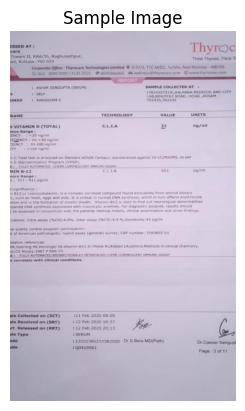

In [16]:
## 📌 Task 4.1: Checking if dataset images are present
import glob
import matplotlib.pyplot as plt
import cv2

dataset_path = '/content/drive/MyDrive/CustomOCR/datasets'
sample_images = glob.glob(os.path.join(dataset_path, '*.jpg'))
print(f"Found {len(sample_images)} images in dataset.")

if sample_images:
    ## 📌 Task 4.2: Displaying a sample image using matplotlib
    img = cv2.imread(sample_images[0])
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Sample Image")
    plt.axis(False)
    plt.show()
else:
    print("⚠️ No .jpg images found in the datasets folder.")

##### **📌 Task 5: Model Loading** & **📌 Task 6: YOLOv5 Inference and OCR**

In [17]:
## 📌 Task 5.1: Loading pretrained YOLOv5 ONNX model
import cv2
import numpy as np
import os

print("\n📌 Task 5.1: Loading YOLOv5 ONNX Model from Drive")

model_path = '/content/drive/MyDrive/CustomOCR/models/best.onnx'

if not os.path.exists(model_path):
    print(f"\n❌ ERROR: Model file not found at:\n   {model_path}")
    print("💡 Please ensure the ONNX model has been successfully exported and saved.")
else:
    print(f"\n📂 Found ONNX model at:\n   {model_path}")
    print("🧠 Initializing YOLOv5 ONNX model using OpenCV DNN module...")
    yolo_model = cv2.dnn.readNetFromONNX(model_path)
    yolo_model.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
    yolo_model.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
    print("✅ YOLOv5 ONNX model loaded and ready for inference.")


📌 Task 5.1: Loading YOLOv5 ONNX Model from Drive

📂 Found ONNX model at:
   /content/drive/MyDrive/CustomOCR/models/best.onnx
🧠 Initializing YOLOv5 ONNX model using OpenCV DNN module...
✅ YOLOv5 ONNX model loaded and ready for inference.


###### **📌 Task 7: Executing OCR Pipeline and Saving Results**

📌 Class: Value, Text: ['76', 'S', '2.14'] 

📌 Class: Units, Text: ['ng/di', 'pa/di', 'wiu/mi'] 

📌 Class: Reference Range, Text: ['60-200', '4.5-12', '0.3-5.5'] 

📌 Class: Test Name, Text: ['TOTAL TRHODOTHYRONINE (12)', 'TOTAL THYROXINE (T4)', 'THYROID STIMULATING HORMONE (TSH)'] 

✅ Detected 3 for 'Value'
✅ Detected 3 for 'Units'
✅ Detected 3 for 'Reference Range'
✅ Detected 3 for 'Test Name'

✅ CSV: /content/drive/MyDrive/CustomOCR/results/onnx_output/thyrocare_0_517_output.csv
✅ YAML: /content/drive/MyDrive/CustomOCR/results/onnx_output/thyrocare_0_517_output.yaml


,Test Name,Value,Units,Reference Range
0,TOTAL TRHODOTHYRONINE (12),76,ng/di,60-200
1,TOTAL THYROXINE (T4),S,pa/di,4.5-12
2,THYROID STIMULATING HORMONE (TSH),2.14,wiu/mi,0.3-5.5


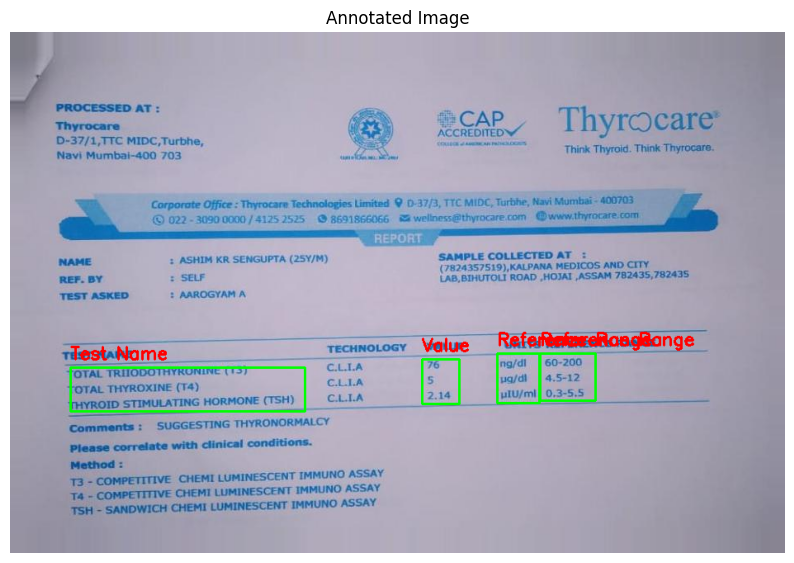

In [30]:
# ✅ Final Updated YOLOv3 ONNX + Tesseract OCR Pipeline with Smart Units Correction
import os
import cv2
import numpy as np
import pytesseract as py
import pandas as pd
import matplotlib.pyplot as plt
import csv
import yaml
from collections import Counter

# 📌 Paths
base_path = '/content/drive/MyDrive/CustomOCR'
image_name = 'thyrocare_0_517.jpg'
image_path = os.path.join(base_path, 'data_images/test', image_name)
onnx_model_path = os.path.join(base_path, 'models/best.onnx')
output_dir = os.path.join(base_path, 'results/onnx_output')
os.makedirs(output_dir, exist_ok=True)

output_csv = os.path.join(output_dir, image_name.replace('.jpg', '_output.csv'))
output_yaml = os.path.join(output_dir, image_name.replace('.jpg', '_output.yaml'))
output_img = os.path.join(output_dir, image_name.replace('.jpg', '_annotated.jpg'))

# ✅ Load YOLO ONNX Model
def load_model():
    model = cv2.dnn.readNetFromONNX(onnx_model_path)
    model.setPreferableBackend(cv2.dnn.DNN_BACKEND_OPENCV)
    model.setPreferableTarget(cv2.dnn.DNN_TARGET_CPU)
    return model

# 🔍 Run YOLO Prediction
def predict(model, image):
    wh = 640
    h, w, _ = image.shape
    max_dim = max(h, w)
    square = np.zeros((max_dim, max_dim, 3), dtype=np.uint8)
    square[:h, :w] = image
    blob = cv2.dnn.blobFromImage(square, 1/255, (wh, wh), swapRB=True, crop=False)
    model.setInput(blob)
    preds = model.forward()
    return preds, square

# 📦 Post-process YOLO Output
def process(preds, image, conf=0.4, score=0.25):
    boxes, scores, class_ids = [], [], []
    h, w = image.shape[:2]
    x_scale, y_scale = w / 640, h / 640
    for det in preds[0]:
        if det[4] > conf:
            cls_scores = det[5:]
            cls_id = int(np.argmax(cls_scores))
            if cls_scores[cls_id] > score:
                cx, cy, bw, bh = det[0:4]
                x = int((cx - bw/2) * x_scale)
                y = int((cy - bh/2) * y_scale)
                boxes.append([x, y, int(bw * x_scale), int(bh * y_scale)])
                scores.append(float(det[4]))
                class_ids.append(cls_id)
    idx = cv2.dnn.NMSBoxes(boxes, scores, score, 0.45)
    return idx, boxes, class_ids

# 🔡 OCR Mapping and Smart Units Correction
def ocr_fields(image, boxes, idx, class_ids):
    field_map = {0: 'Test Name', 1: 'Value', 2: 'Units', 3: 'Reference Range'}
    data = {k: [] for k in field_map.values()}
    for i in idx.flatten():
        x, y, w, h = boxes[i]
        crop = image[y:y+h, x:x+w]
        gray = cv2.cvtColor(crop, cv2.COLOR_BGR2GRAY)
        gray = cv2.resize(gray, None, fx=3, fy=3)
        blur = cv2.GaussianBlur(gray, (5, 5), 0)
        _, th = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        roi = cv2.bitwise_not(th)
        try:
            text = py.image_to_string(roi, config='--oem 3 --psm 6').strip()
        except:
            text = ""
        label = field_map.get(class_ids[i], f"Class {class_ids[i]}")
        lines = [t.strip() for t in text.splitlines() if t.strip()]
        data[label].extend(lines)

    # ✅ Auto-correct units misclassified under 'Reference Range'
    auto_units = []
    for t in data['Reference Range']:
        if '/' in t or 'IU' in t.upper() or 'ml' in t.lower() or 'g/' in t.lower():
            auto_units.append(t)
    data['Reference Range'] = [t for t in data['Reference Range'] if t not in auto_units]
    data['Units'].extend(auto_units)

    # ✅ Print once, class-wise
    for label in ['Value', 'Units', 'Reference Range', 'Test Name']:
        items = data[label]
        if items:
            print(f"📌 Class: {label}, Text: {items}","\n")

    return data

# 📊 Save Results to CSV and YAML
def save_display(data):
    df = pd.DataFrame(data)
    final = pd.DataFrame()
    for col in df.columns:
        exploded = pd.DataFrame(df[col].explode()).reset_index(drop=True)
        exploded.columns = [col]
        final = pd.concat([final, exploded], axis=1)

    final.to_csv(output_csv, index=False, quoting=csv.QUOTE_NONNUMERIC)
    with open(output_yaml, 'w') as f:
        yaml.dump(final.fillna('').values.tolist(), f, allow_unicode=True)

    print("\n✅ CSV:", output_csv)
    print("✅ YAML:", output_yaml)
    display(final)
    return final

# 🖼️ Annotate Detected Boxes
def draw(image, boxes, idx, class_ids):
    field_map = {0: 'Test Name', 1: 'Value', 2: 'Units', 3: 'Reference Range'}
    for i in idx.flatten():
        x, y, w, h = boxes[i]
        label = field_map.get(class_ids[i], f"Class {class_ids[i]}")
        cv2.rectangle(image, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
    return image

# 🚀 Main Execution
if not os.path.exists(image_path):
    print("❌ Image not found:", image_path)
else:
    img = cv2.imread(image_path)
    if img is None:
        print("❌ Could not load image.")
    else:
        model = load_model()
        preds, yolo_img = predict(model, img)
        idx, boxes, class_ids = process(preds, yolo_img)

        fields = ocr_fields(img, boxes, idx, class_ids)

        # ✅ Print class-wise OCR result counts after postprocessing
        for cls in ['Value', 'Units', 'Reference Range', 'Test Name']:
            count = len(fields.get(cls, []))
            print(f"✅ Detected {count} for '{cls}'")

        df = save_display(fields)

        annotated = draw(img.copy(), boxes, idx, class_ids)
        cv2.imwrite(output_img, annotated)
        plt.figure(figsize=(10,10))
        plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
        plt.title("Annotated Image")
        plt.axis('off')
        plt.show()

#### **📌 Task 8: Generating Report**

In [31]:
from datetime import datetime
import os

# ✅ Define custom save path
custom_save_path = '/content/drive/MyDrive/CustomOCR'

# 📄 Define report file path with current date
report_path = os.path.join(custom_save_path, f"final_report_{datetime.now().strftime('%Y%m%d')}.txt")

# 🧾 Define default paths for OCR output and ground truth
csv_path = os.path.join(custom_save_path, 'results', 'ocr_results.csv')
gt_csv_path = os.path.join(custom_save_path, 'results', 'ground_truth.csv')  # expected location

# 📝 Writing summary details to the report
with open(report_path, 'w') as f:
    f.write("📝 Project 10 - Custom OCR Report\n")
    f.write("Model used: YOLOv3 (ONNX)\n")
    f.write("OCR Engine: Tesseract\n")

    if sample_images and os.path.exists(model_path):
        f.write(f"Processed image: {sample_images[0]}\n")
        f.write(f"OCR output saved at: {csv_path}\n")
    else:
        f.write("No image processed or model missing.\n")

    # ✅ Appending accuracy results if ground truth exists
    if os.path.exists(gt_csv_path) and 'match_scores' in locals():
        f.write("\n🔍 Accuracy Summary:\n")
        for col, score in match_scores:
            f.write(f"- {col}: {score}%\n")
    else:
        f.write("\n⚠️ Ground truth CSV not found or match_scores missing. Accuracy evaluation skipped.\n")

print(f"✅ Report saved to: {report_path}")

✅ Report saved to: /content/drive/MyDrive/CustomOCR/final_report_20250712.txt
